In [1]:
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator    
from keras.applications import MobileNetV2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

ImageDataGenerator.flow_from_directory(), the default behavior is converts to RGB

In [3]:
import tensorflow as tf

# Data augmentation for training
train_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Training data (80%)
train_data = train_gen.flow_from_directory(
    'train',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation data (20%)
val_data = train_gen.flow_from_directory(
    'train',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Test data (separate unseen dataset)
test_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_data = test_gen.flow_from_directory(
    'test',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
train_data.image_shape

(224, 224, 3)

In [7]:
train_data.labels

array([0, 0, 0, ..., 6, 6, 6], shape=(22968,), dtype=int32)

In [ ]:
base=MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base.layers:
    layer.trainable=False
model=Sequential([
    base,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(7, activation='softmax')
])

In [9]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
early_stopping=EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
model.fit(train_data, epochs=20, validation_data=val_data, callbacks=[early_stopping])

c:\Users\lenovo\Desktop\MoodMate\virtual\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 440s 609ms/step - accuracy: 0.3032 - loss: 1.8207 - val_accuracy: 0.3790 - val_loss: 1.6269
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 376s 523ms/step - accuracy: 0.3578 - loss: 1.6659 - val_accuracy: 0.3886 - val_loss: 1.6044
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 379s 528ms/step - accuracy: 0.3666 - loss: 1.6395 - val_accuracy: 0.3860 - val_loss: 1.5902
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 376s 524ms/step - accuracy: 0.3757 - loss: 1.6194 - val_accuracy: 0.4053 - val_loss: 1.5485
Epoch 5/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 364s 508ms/step - accuracy: 0.3762 - loss: 1.6235 - val_accuracy: 0.3957 - val_loss: 1.5622
Epoch 6/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 353s 491ms/step - accuracy: 0.3770 - loss: 1.6259 - val_accuracy: 0.3731 - val_loss: 1.6203
Epoch 7/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 335s 466ms/step - accuracy: 0.3724 - loss: 1.6224 - val_accuracy: 0.3701 - val_loss: 1.5977


In [12]:
pred=model.predict(test_data)


c:\Users\lenovo\Desktop\MoodMate\virtual\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 119s 528ms/step


In [13]:
pred[:10]

array([[0.1362201 , 0.07076359, 0.18178542, 0.03733328, 0.30923164,
        0.2617791 , 0.00288692],
       [0.13849097, 0.09818608, 0.18586409, 0.08199058, 0.20228109,
        0.09581994, 0.1973673 ],
       [0.07334692, 0.01607818, 0.12689228, 0.06181782, 0.04829519,
        0.6642212 , 0.00934839],
       [0.13880914, 0.01830273, 0.04679225, 0.07473701, 0.3077107 ,
        0.41221854, 0.00142959],
       [0.18080114, 0.11732887, 0.18395515, 0.12454074, 0.07580618,
        0.21215327, 0.1054147 ],
       [0.04899333, 0.01983671, 0.648899  , 0.03797035, 0.07231734,
        0.13637896, 0.03560442],
       [0.11155283, 0.01037194, 0.13089485, 0.2714453 , 0.27043784,
        0.19757128, 0.00772593],
       [0.15516356, 0.00448828, 0.22180088, 0.04584095, 0.21519674,
        0.11185117, 0.24565841],
       [0.01883955, 0.0010412 , 0.04420652, 0.18309115, 0.60110605,
        0.12574762, 0.02596793],
       [0.3363691 , 0.04930247, 0.12113568, 0.24793161, 0.09071908,
        0.10711478, 0.0

In [14]:
import pandas as pd
print(pd.DataFrame({ 'actual': test_data.labels, 'predicted': np.argmax(pred, axis=1)}).head(10))

   actual  predicted
0       0          4
1       0          4
2       0          5
3       0          5
4       0          5
5       0          2
6       0          3
7       0          6
8       0          4
9       0          0


In [15]:
print(accuracy_score(test_data.labels, np.argmax(pred, axis=1)))

0.41613262747283364


with training layers( without freezing)

In [16]:
for layer in base.layers[-20:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
model.fit(train_data, epochs=10, validation_data=val_data, callbacks=[early_stopping])

Epoch 1/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 395s 543ms/step - accuracy: 0.3400 - loss: 1.7338 - val_accuracy: 0.4043 - val_loss: 1.5766
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 375s 523ms/step - accuracy: 0.3954 - loss: 1.5782 - val_accuracy: 0.4276 - val_loss: 1.5242
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 407s 567ms/step - accuracy: 0.4143 - loss: 1.5234 - val_accuracy: 0.4379 - val_loss: 1.4858
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 375s 523ms/step - accuracy: 0.4395 - loss: 1.4673 - val_accuracy: 0.4475 - val_loss: 1.4434
Epoch 5/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 349s 486ms/step - accuracy: 0.4495 - loss: 1.4395 - val_accuracy: 0.4590 - val_loss: 1.4269
Epoch 6/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 343s 478ms/step - accuracy: 0.4602 - loss: 1.4085 - val_accuracy: 0.4715 - val_loss: 1.3930
Epoch 7/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 547s 763ms/step - accuracy: 0.4675 - loss: 1.3933 - val_accuracy: 0.4720 - val_loss: 1.3757
Epoch 8/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 440s 613ms/step - accuracy: 0.4787 -

In [19]:
pred=model.predict(test_data)

225/225 ━━━━━━━━━━━━━━━━━━━━ 153s 677ms/step


In [20]:
print(accuracy_score(test_data.labels, np.argmax(pred, axis=1)))

0.49986068542769574


using LR Scheduler

MobileNetV2 has a total of 155 layers

In [22]:
base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))


for layer in base.layers[-50:]:
    layer.trainable = True

model2 = Sequential([
    base,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),  
    Dropout(0.4),
    Dense(7, activation='softmax')
])

ReduceLROnPlateau is a Keras callback that helps your model adapt the learning rate automatically during training to improve convergence and prevent getting stuck in local minima.

In [26]:
from keras.callbacks import ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

model2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

In [27]:

model2.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 1107s 2s/step - accuracy: 0.4230 - loss: 1.6040 - val_accuracy: 0.3137 - val_loss: 1.8833 - learning_rate: 0.0010
Epoch 2/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 1187s 2s/step - accuracy: 0.5125 - loss: 1.4423 - val_accuracy: 0.3306 - val_loss: 2.0515 - learning_rate: 0.0010
Epoch 3/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 1146s 2s/step - accuracy: 0.5399 - loss: 1.3988 - val_accuracy: 0.1930 - val_loss: 2.8282 - learning_rate: 0.0010
Epoch 4/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 1186s 2s/step - accuracy: 0.5996 - loss: 1.2778 - val_accuracy: 0.5257 - val_loss: 1.4678 - learning_rate: 2.0000e-04
Epoch 5/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 1349s 2s/step - accuracy: 0.6201 - loss: 1.2402 - val_accuracy: 0.5875 - val_loss: 1.2802 - learning_rate: 2.0000e-04
Epoch 6/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 1124s 2s/step - accuracy: 0.6311 - loss: 1.2187 - val_accuracy: 0.6166 - val_loss: 1.2341 - learning_rate: 2.0000e-04
Epoch 7/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 1149s 2s/step - accuracy

In [28]:
pred2=model2.predict(test_data)

225/225 ━━━━━━━━━━━━━━━━━━━━ 151s 667ms/step


In [34]:
print("with training layers")
print(accuracy_score(test_data.labels, np.argmax(pred2, axis=1)))

with training layers
0.6705210365004179


In [30]:
model2.save("my_model.h5")

In [31]:
import tensorflow as tf 
model2.save('mobilenetmodel.keras')


loading the model

In [28]:
import keras 
mobilenet = keras.models.load_model("C:\\Users\\lenovo\\Desktop\\MoodMate\\mobilenetmodel.keras")

c:\Users\lenovo\Desktop\MoodMate\virtual\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 162 variables whereas the saved optimizer has 322 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


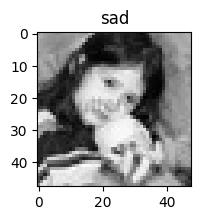

In [29]:
import matplotlib.pyplot as plt
from PIL import Image 
plt.figure(figsize=(3,2))
path="C:\\Users\\lenovo\\Desktop\\MoodMate\\test\\sad\\PrivateTest_366361.jpg"
plt.imshow(Image.open(path),cmap='gray')
plt.title('sad')
plt.show()

In [30]:
import numpy as np
img=Image.open(path).resize((224,224))
img=img.convert('RGB')
img=np.array(img)


In [31]:
img.shape

(224, 224, 3)

In [32]:
img=img.reshape(1,224,224,3)

In [33]:
predict=mobilenet.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step


In [34]:
print(predict)

[[0.14403072 0.05813936 0.169947   0.13176957 0.18891205 0.11450417
  0.19269717]]


In [ ]:
#1.angry(0) 2.disgust(1)  3.fear(2) 4.happy(3)  5.neutral(4) 6.sad(5)  7.surprise(6) 

In [35]:
print(np.argmax(predict))

6


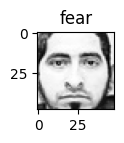

In [40]:
path2="C:\\Users\\lenovo\\Desktop\\MoodMate\\test\\fear\\PrivateTest_518212.jpg"
plt.figure(figsize=(2,1))
plt.imshow(Image.open(path2),cmap='gray')
plt.title('fear')
plt.show()

In [42]:
img2=Image.open(path2).resize((224,224))
img2=img2.convert('RGB')
img2=np.array(img2)

In [43]:
img2=img2.reshape(1,224,224,3)

In [44]:
predict2=mobilenet.predict(img2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


In [46]:
predict2

array([[0.16283701, 0.05844242, 0.18414363, 0.12232582, 0.18976618,
        0.12233556, 0.16014938]], dtype=float32)

fear(2) and netural(4) got nearly .18

In [45]:
print(np.argmax(predict2))

4
